In [114]:
import requests
import pandas as pd


def stock_to_df(code):
    stock = code
    response = requests.get("https://m.stock.naver.com/api/item/getPriceDayList.nhn?code={}&pageSize=10000&page=1".format(stock))

    df_stock = pd.DataFrame(response.json()["result"]["list"])
    df_stock.index = pd.to_datetime(df_stock["dt"], format="%Y%m%d").reset_index(drop=True)
    df_stock = df_stock.sort_index().drop("dt", axis=1)
    return df_stock

    


kospi_info = pd.read_csv("./market_info/kospi.csv", index_col=0)
kosdaq_info = pd.read_csv("./market_info/kosdaq.csv", index_col=0)
date_info = pd.read_csv("./market_info/date_df.csv", index_col=0)["dt"]
date_info = pd.to_datetime(date_info, format="%Y%m%d").sort_values(ascending=True).reset_index(drop=True)

kospi_list = pd.Series(kospi_info[kospi_info["section"] == 1].index).apply(lambda x: x[1:])
kosdaq_list = pd.Series(kosdaq_info[kosdaq_info["section"] == 1].index).apply(lambda x: x[1:])

df_price_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_price_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)

for x in kospi_list:
    try:
        df_stock = stock_to_df(x)
        df_price_kospi[x] = df_stock["ncv"]
    except Exception as e_1:
        try:
            df_price_kosdaq[x] = df_stock["ncv"]
        except Exception as e_2:
            print(x, e_2)
    print(x, " done.")
    
    
for x in kosdq:
    try:
        df_stock = stock_to_df(x)
        df_price_kospi[x] = df_stock["ncv"]
    except Exception as e_1:
        try:
            df_price_kosdaq[x] = df_stock["ncv"]
        except Exception as e_2:
            print(x, e_2)
    print(x, " done.")
        




000020  done.
000040  done.
000050  done.
000060  done.
000070  done.
000075  done.
000080  done.
000087  done.
000100  done.
000105  done.
000120  done.
000140  done.
000145  done.
000150  done.
000155  done.
000157  done.
000180  done.
000210  done.
000215  done.
000220  done.
000225  done.
000227  done.
000230  done.
000240  done.
000270  done.
000300  done.
000320  done.
000325  done.
000370  done.
000390  done.
000400  done.
000430  done.
000480  done.
000490  done.
000500  done.
000520  done.
000540  done.
000545  done.
000547  done.
000590  done.
000640  done.
000650  done.
000660  done.
000670  done.
000680  done.
000700  done.
000720  done.
000725  done.
000760  done.
000810  done.
000815  done.
000850  done.
000860  done.
000880  done.
000885  done.
00088K  done.
000890  done.
000910  done.
000950  done.
000970  done.
000990  done.
000995  done.
001020  done.
001040  done.
001045  done.
001060  done.
001065  done.
001067  done.
001070  done.
001080  done.
001120  done.
001130

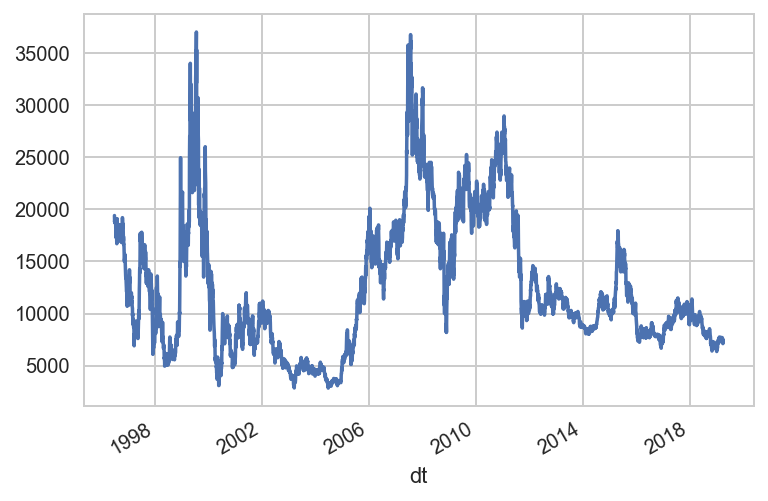

In [117]:
df_price_kospi["006800"].plot()

In [98]:
df_stock[df_stock["cr"] > 30]

,aq,cr,cv,hv,lv,ncv,ov,rf
dt,,,,,,,,


In [42]:
for x in kospi_info["section"].unique():
    print(x, kospi_info[kospi_info["section"] == x].shape[0])

1 884
10 421
4 6
3 6
5 1
2 6
13 1
17 192


In [43]:
for x in kosdaq_info["section"].unique():
    print(x, kosdaq_info[kosdaq_info["section"] == x].shape[0])

1 1315
13 14
6 5


In [45]:
kospi_list.values

array(['000020', '000040', '000050', '000060', '000070', '000075',
       '000080', '000087', '000100', '000105', '000120', '000140',
       '000145', '000150', '000155', '000157', '000180', '000210',
       '000215', '000220', '000225', '000227', '000230', '000240',
       '000270', '000300', '000320', '000325', '000370', '000390',
       '000400', '000430', '000480', '000490', '000500', '000520',
       '000540', '000545', '000547', '000590', '000640', '000650',
       '000660', '000670', '000680', '000700', '000720', '000725',
       '000760', '000810', '000815', '000850', '000860', '000880',
       '000885', '00088K', '000890', '000910', '000950', '000970',
       '000990', '000995', '001020', '001040', '001045', '001060',
       '001065', '001067', '001070', '001080', '001120', '001130',
       '001140', '001200', '001210', '001230', '001250', '001260',
       '001270', '001275', '001290', '001340', '001360', '001380',
       '001390', '001420', '001430', '001440', '001450', '0014